In [ ]:
!pip install bt

In [1]:
import bt #백테스팅
import yfinance as yf
import pandas as pd

In [2]:
# 백테스팅 날짜 선정
start = '2010-01-01'
end = '2024-01-01'

### 종목선정

`산업군별 대표 ETF`

- XLV: Healthcare Select Sector SPDR (헬스케어)

- XLU: Utilities Select Sector SPDR (유틸리티)

- XLP: Consumer Staples Select Sector SPDR (필수소비재)

- VNQ: Vanguard Real Estate ETF (부동산)

[*********************100%***********************]  4 of 4 completed
100%|██████████| 1/1 [00:00<00:00,  2.40it/s]


Stat                 Stable Portfolio
-------------------  ------------------
Start                2010-01-03
End                  2023-12-29
Risk-free rate       0.00%

Total Return         304.47%
Daily Sharpe         0.74
Daily Sortino        1.16
CAGR                 10.51%
Max Drawdown         -32.44%
Calmar Ratio         0.32

MTD                  4.44%
3m                   8.91%
6m                   3.07%
YTD                  1.16%
1Y                   0.55%
3Y (ann.)            6.06%
5Y (ann.)            9.25%
10Y (ann.)           9.02%
Since Incep. (ann.)  10.51%

Daily Sharpe         0.74
Daily Sortino        1.16
Daily Mean (ann.)    11.13%
Daily Vol (ann.)     15.01%
Daily Skew           -0.49
Daily Kurt           16.68
Best Day             8.22%
Worst Day            -11.29%

Monthly Sharpe       0.91
Monthly Sortino      1.71
Monthly Mean (ann.)  11.05%
Monthly Vol (ann.)   12.09%
Monthly Skew         -0.32
Monthly Kurt         0.09
Best Month           9.66%
Worst Month  

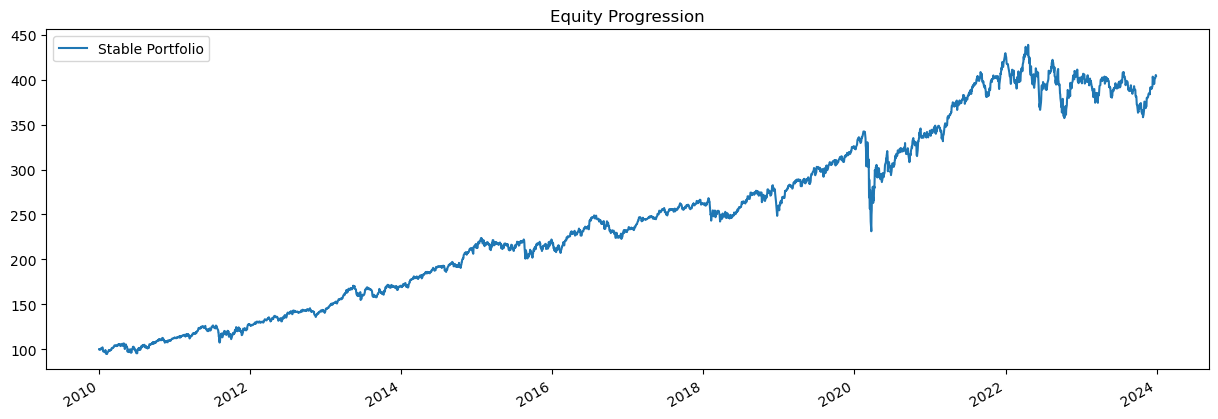

In [ ]:
import yfinance as yf
import bt

# ETF 목록
tickers = ['XLV', 'XLU', 'XLP', 'VNQ']

# 데이터 다운로드
df = yf.download(tickers, start="2010-01-01", end="2024-01-01")['Adj Close']

# 백테스트 실행
strategy = bt.Strategy(
    'Stable Portfolio',
    [bt.algos.RunOnce(),
     bt.algos.SelectAll(),
     bt.algos.WeighEqually(),
     bt.algos.Rebalance()]
)
backtest = bt.Backtest(strategy, df)
result = bt.run(backtest)

result.plot()
result.display()

### 전략 구성 요소
- bt.algos.RunOnce()
백테스팅 시작 시점에 한 번만 전략을 실행

- bt.algos.SelectAll()
주어진 데이터셋 내의 모든 자산(ETF)을 선택
- bt.algos.WeighEqually()
선택된 자산을 동일한 비중(가중치)으로 할당
- bt.algos.Rebalance()
초기 비중에 맞춰 포트폴리오를 재조정(Rebalancing)함

## Risk Parity (위험 균등화) 전략 사용

- 자산군별로 변동성을 고려해 위험이 동일하도록 비중 조정
- 안정적 수익률을 목표로 함

[계산 예시]


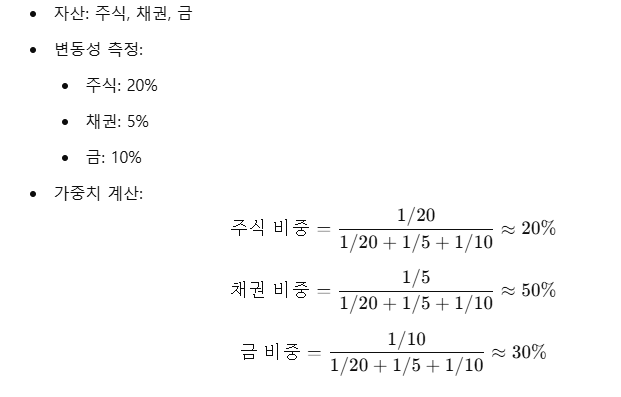

100%|██████████| 1/1 [00:01<00:00,  1.10s/it]


Stat                 Risk Parity Portfolio
-------------------  -----------------------
Start                2010-01-03
End                  2023-12-29
Risk-free rate       0.00%

Total Return         289.31%
Daily Sharpe         0.74
Daily Sortino        1.15
CAGR                 10.21%
Max Drawdown         -32.17%
Calmar Ratio         0.32

MTD                  4.25%
3m                   8.48%
6m                   2.38%
YTD                  0.57%
1Y                   -0.03%
3Y (ann.)            5.98%
5Y (ann.)            9.32%
10Y (ann.)           9.09%
Since Incep. (ann.)  10.21%

Daily Sharpe         0.74
Daily Sortino        1.15
Daily Mean (ann.)    10.79%
Daily Vol (ann.)     14.56%
Daily Skew           -0.51
Daily Kurt           18.21
Best Day             8.30%
Worst Day            -11.14%

Monthly Sharpe       0.88
Monthly Sortino      1.65
Monthly Mean (ann.)  10.51%
Monthly Vol (ann.)   11.90%
Monthly Skew         -0.31
Monthly Kurt         0.19
Best Month           9.74%
Wo

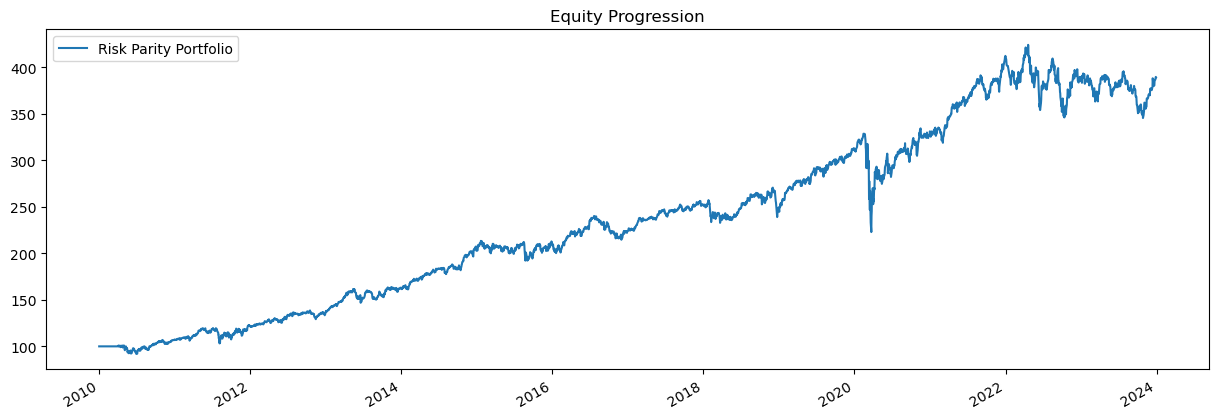

In [18]:
# 리스크 균형 가중치 계산 함수
def calculate_risk_parity_weights(data):
    returns = data.pct_change().dropna()
    volatilities = returns.std()
    inv_vol = 1 / volatilities
    weights = inv_vol / inv_vol.sum()
    return weights

class RiskParityWeights(bt.Algo):
    def __init__(self, lookback=63):  # 약 3개월 데이터 기준
        self.lookback = lookback

    def __call__(self, target):
        hist = target.universe.iloc[-self.lookback:]
        if len(hist) < self.lookback:
            return False

        weights = calculate_risk_parity_weights(hist)
        target.temp['weights'] = weights.to_dict()
        return True

# 리스크 균형 전략 정의
strategy_risk_parity = bt.Strategy(
    'Risk Parity Portfolio',
    [
        bt.algos.RunMonthly(),
        bt.algos.SelectAll(),
        RiskParityWeights(lookback=63),  # 3개월 변동성 기준
        bt.algos.WeighSpecified(),
        bt.algos.Rebalance()
    ]
)

# 백테스트 실행
backtest_risk_parity = bt.Backtest(strategy_risk_parity, df)
result_risk_parity = bt.run(backtest_risk_parity)

result_risk_parity.plot()
result_risk_parity.display()

100%|██████████| 1/1 [00:00<00:00,  1.39it/s]


Stat                 Risk Parity (Quarterly)
-------------------  -------------------------
Start                2010-01-03
End                  2023-12-29
Risk-free rate       0.00%

Total Return         293.70%
Daily Sharpe         0.75
Daily Sortino        1.16
CAGR                 10.30%
Max Drawdown         -31.91%
Calmar Ratio         0.32

MTD                  4.48%
3m                   8.83%
6m                   2.76%
YTD                  1.02%
1Y                   0.41%
3Y (ann.)            6.10%
5Y (ann.)            9.58%
10Y (ann.)           9.20%
Since Incep. (ann.)  10.30%

Daily Sharpe         0.75
Daily Sortino        1.16
Daily Mean (ann.)    10.87%
Daily Vol (ann.)     14.58%
Daily Skew           -0.48
Daily Kurt           17.69
Best Day             8.45%
Worst Day            -10.88%

Monthly Sharpe       0.89
Monthly Sortino      1.66
Monthly Mean (ann.)  10.60%
Monthly Vol (ann.)   11.95%
Monthly Skew         -0.30
Monthly Kurt         0.20
Best Month           9.75%

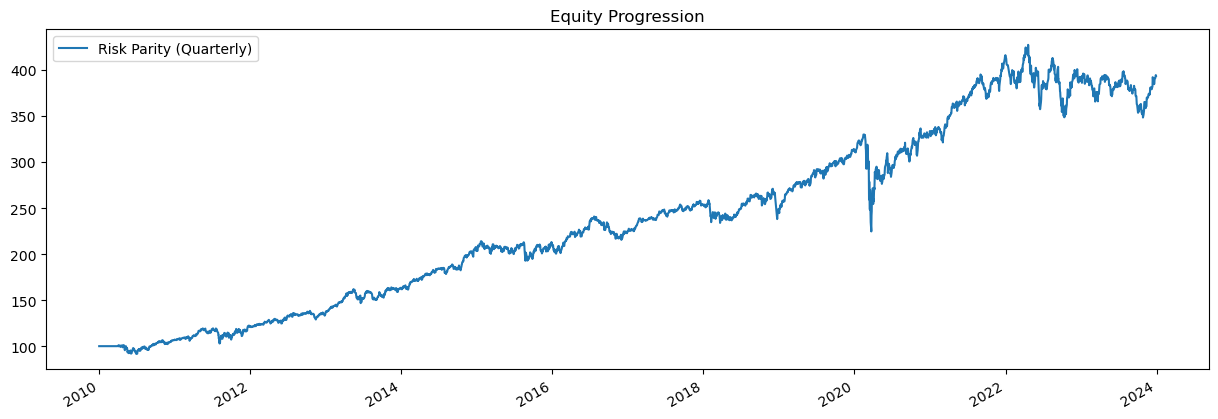

In [ ]:
# Risk Parity 전략 정의 - 분기별 리밸런싱
strategy_quarterly = bt.Strategy(
    'Risk Parity (Quarterly)',
    [
        bt.algos.RunQuarterly(),        # 분기별 리밸런싱 실행
        bt.algos.SelectAll(),           # 모든 자산 선택
        RiskParityWeights(),            # 위험 균등 가중치
        bt.algos.Rebalance()            # 리밸런싱 실행
    ]
)

# 백테스트 실행
backtest_quarterly = bt.Backtest(strategy_quarterly, df)
result_quarterly = bt.run(backtest_quarterly)

# 결과 출력
result_quarterly.plot()
result_quarterly.display()

### Momentum Risk Parity 전략
- Risk Parity(위험 균형) + Momentum(모멘텀) 결합

- 모멘텀 요소를 추가하여 상승 추세에 있는 자산에 더 높은 비중을 할당

100%|██████████| 1/1 [00:01<00:00,  1.25s/it]


Stat                 Momentum Risk Parity
-------------------  ----------------------
Start                2010-01-03
End                  2023-12-29
Risk-free rate       0.00%

Total Return         319.89%
Daily Sharpe         0.77
Daily Sortino        1.21
CAGR                 10.80%
Max Drawdown         -31.63%
Calmar Ratio         0.34

MTD                  4.28%
3m                   9.07%
6m                   2.82%
YTD                  1.16%
1Y                   0.54%
3Y (ann.)            6.17%
5Y (ann.)            9.59%
10Y (ann.)           9.30%
Since Incep. (ann.)  10.80%

Daily Sharpe         0.77
Daily Sortino        1.21
Daily Mean (ann.)    11.35%
Daily Vol (ann.)     14.72%
Daily Skew           -0.44
Daily Kurt           16.54
Best Day             8.37%
Worst Day            -10.77%

Monthly Sharpe       0.95
Monthly Sortino      1.79
Monthly Mean (ann.)  11.28%
Monthly Vol (ann.)   11.88%
Monthly Skew         -0.32
Monthly Kurt         0.14
Best Month           9.75%
Worst

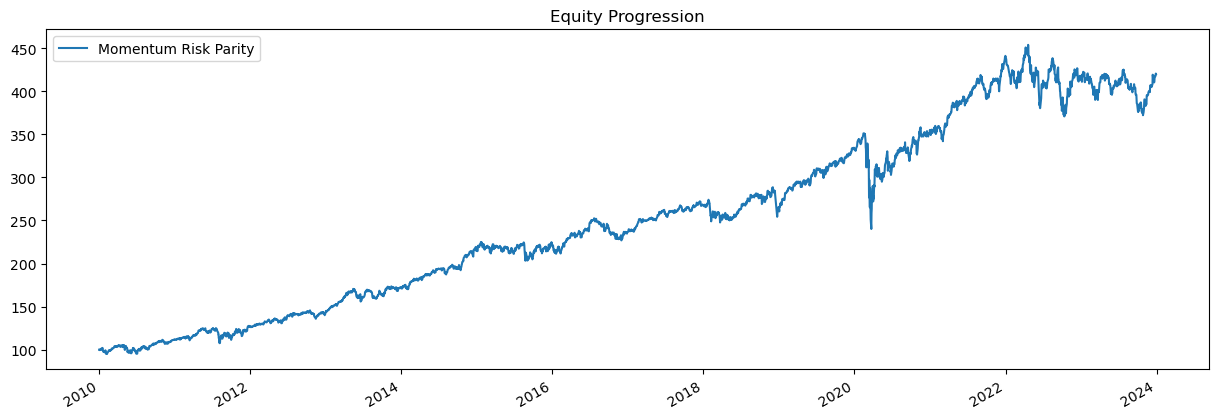

In [23]:
class MomentumRiskParityWeights(bt.Algo):
    def __init__(self, data, momentum_window=126):
        self.data = data
        self.momentum_window = momentum_window

    def __call__(self, target):
        if not target.temp['selected']:
            return False
        
        # 변동성 계산
        std_dev = self.data[target.temp['selected']].pct_change().std()
        
        # 모멘텀 계산 (최근 momentum_window 기간의 수익률)
        momentum = self.data[target.temp['selected']].pct_change(self.momentum_window).mean()

        # 가중치 계산 (변동성 역수 * 모멘텀)
        weights = (1 / std_dev) * (1 + momentum)
        weights = weights / weights.sum()
        
        # 가중치 적용
        target.temp['weights'] = weights.to_dict()
        return True

# Risk Parity + Momentum 전략 정의
strategy_momentum = bt.Strategy(
    'Momentum Risk Parity',
    [
        bt.algos.RunMonthly(),                    # 매월 실행
        bt.algos.SelectAll(),                     # 모든 자산 선택
        MomentumRiskParityWeights(df),          # 모멘텀 기반 위험 균등 가중치
        bt.algos.Rebalance()                      # 리밸런싱 실행
    ]
)

# 백테스트 실행
backtest_momentum = bt.Backtest(strategy_momentum, df)
result_momentum = bt.run(backtest_momentum)

# 결과 출력
result_momentum.plot()
result_momentum.display()

### Capped Risk Parity 전략
- 기존의 Risk Parity (위험 균형) 전략에 가중치 상한선과 하한선을 적용하여 특정 자산이 포트폴리오에서 과도한 비중을 차지하지 못하도록 조정

100%|██████████| 1/1 [00:01<00:00,  1.18s/it]


Stat                 Capped Risk Parity
-------------------  --------------------
Start                2010-01-03
End                  2023-12-29
Risk-free rate       0.00%

Total Return         319.29%
Daily Sharpe         0.77
Daily Sortino        1.21
CAGR                 10.79%
Max Drawdown         -31.66%
Calmar Ratio         0.34

MTD                  4.29%
3m                   9.09%
6m                   2.82%
YTD                  1.17%
1Y                   0.54%
3Y (ann.)            6.16%
5Y (ann.)            9.58%
10Y (ann.)           9.29%
Since Incep. (ann.)  10.79%

Daily Sharpe         0.77
Daily Sortino        1.21
Daily Mean (ann.)    11.35%
Daily Vol (ann.)     14.72%
Daily Skew           -0.44
Daily Kurt           16.56
Best Day             8.37%
Worst Day            -10.79%

Monthly Sharpe       0.95
Monthly Sortino      1.79
Monthly Mean (ann.)  11.27%
Monthly Vol (ann.)   11.89%
Monthly Skew         -0.32
Monthly Kurt         0.15
Best Month           9.76%
Worst Mon

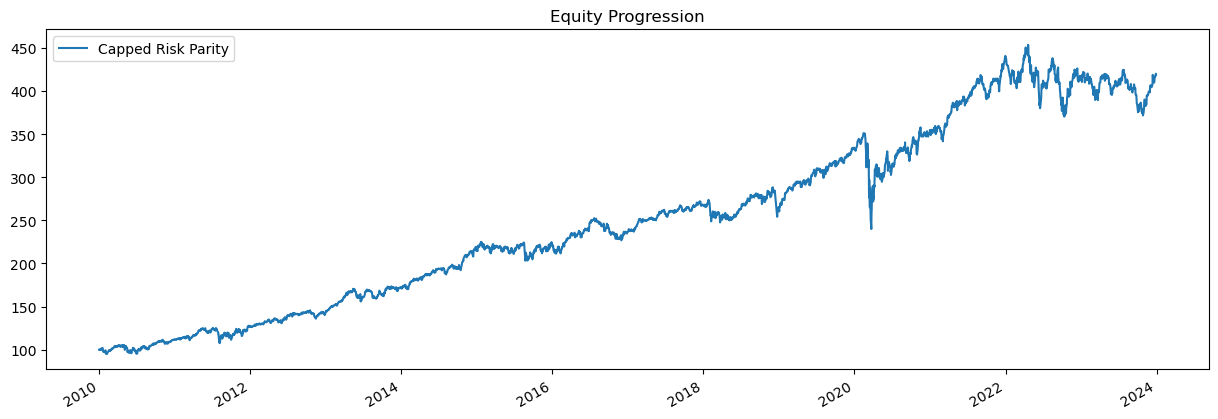

In [ ]:
class CappedRiskParityWeights(bt.Algo):
    def __init__(self, data, max_weight=0.4, min_weight=0.05):
        self.data = data
        self.max_weight = max_weight
        self.min_weight = min_weight

    def __call__(self, target):
        if not target.temp['selected']:
            return False
        
        # 변동성 계산
        std_dev = self.data[target.temp['selected']].pct_change().std()
        weights = 1 / std_dev
        weights = weights / weights.sum()
        
        # 가중치 상한선 및 하한선 적용
        weights = weights.clip(lower=self.min_weight, upper=self.max_weight)
        weights = weights / weights.sum()  # 다시 정규화

        # 가중치 적용
        target.temp['weights'] = weights.to_dict()
        return True

# Risk Parity + 가중치 제한 전략 정의
strategy_capped = bt.Strategy(
    'Capped Risk Parity',
    [
        bt.algos.RunMonthly(),                 # 매월 실행
        bt.algos.SelectAll(),                  # 모든 자산 선택
        CappedRiskParityWeights(df),           # 상한/하한 적용 가중치
        bt.algos.Rebalance()                   # 리밸런싱 실행
    ]
)

# 백테스트 실행
backtest_capped = bt.Backtest(strategy_capped, df)
result_capped = bt.run(backtest_capped)

# 결과 출력
result_capped.plot()
result_capped.display()

### 전략 비교

In [24]:
# 백테스트 실행
backtests = {
    "Risk Parity (Monthly)": bt.Backtest(strategy, df),
    "Risk Parity (Quarterly)": bt.Backtest(strategy_quarterly, df),
    "Momentum Risk Parity": bt.Backtest(strategy_momentum, df),
    "Capped Risk Parity": bt.Backtest(strategy_capped, df)
}

# 모든 백테스트 실행
results = bt.run(*backtests.values())

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:03<00:00,  1.13it/s]


In [25]:
# 결과 요약 출력
results.display()

# 개별 전략의 성과 지표 정리
# 결과를 데이터프레임으로 변환
import pandas as pd

comparison = pd.DataFrame({
    name: {
        "CAGR": backtest.stats['cagr'],
        "Max Drawdown": backtest.stats['max_drawdown'],
        "Sharpe Ratio": backtest.stats['daily_sharpe']
    }
    for name, backtest in backtests.items()
}).T

Stat                 Stable Portfolio    Risk Parity (Quarterly)    Momentum Risk Parity    Capped Risk Parity
-------------------  ------------------  -------------------------  ----------------------  --------------------
Start                2010-01-03          2010-01-03                 2010-01-03              2010-01-03
End                  2023-12-29          2023-12-29                 2023-12-29              2023-12-29
Risk-free rate       0.00%               0.00%                      0.00%                   0.00%

Total Return         304.47%             293.70%                    319.89%                 319.29%
Daily Sharpe         0.74                0.75                       0.77                    0.77
Daily Sortino        1.16                1.16                       1.21                    1.21
CAGR                 10.51%              10.30%                     10.80%                  10.79%
Max Drawdown         -32.44%             -31.91%                    -31.63%   

TypeError: 'PerformanceStats' object is not subscriptable

<AxesSubplot:title={'center':"Comparison of Strategies' Cumulative Returns"}>

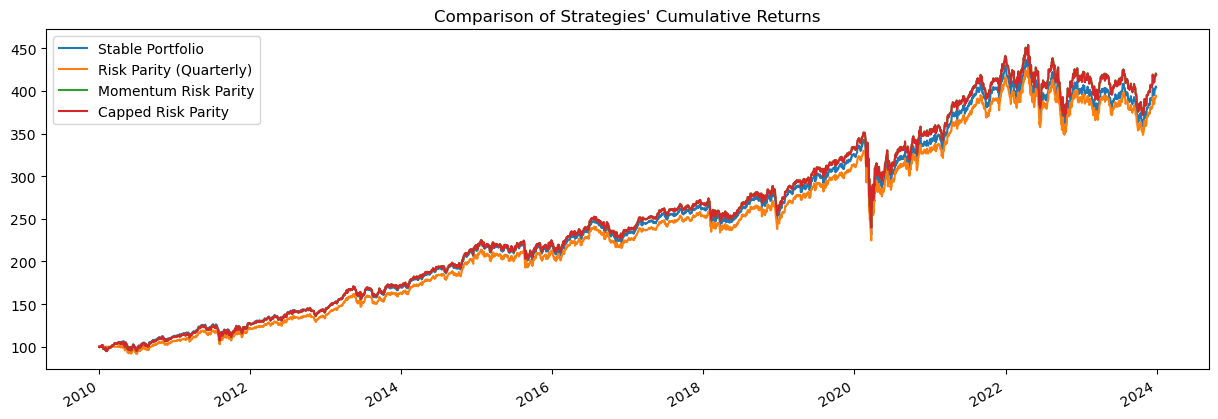

In [26]:
# 누적 수익률 비교 그래프
results.plot(title="Comparison of Strategies' Cumulative Returns")

### 벤치마크 비교

- 전략의 성과를 시장 벤치마크(예: S&P 500 ETF SPY 또는 MSCI World Index)와 비교.

- 목적: 전략이 시장 대비 얼마나 초과 수익을 창출했는지 평가.

[*********************100%***********************]  1 of 1 completed
100%|██████████| 2/2 [00:00<00:00,  3.54it/s]


Stat                 Capped Risk Parity    Benchmark (SPY)
-------------------  --------------------  -----------------
Start                2010-01-03            2010-01-03
End                  2023-12-29            2023-12-29
Risk-free rate       0.00%                 0.00%

Total Return         319.29%               445.51%
Daily Sharpe         0.77                  0.79
Daily Sortino        1.21                  1.22
CAGR                 10.79%                12.90%
Max Drawdown         -31.66%               -33.72%
Calmar Ratio         0.34                  0.38

MTD                  4.29%                 4.57%
3m                   9.09%                 11.64%
6m                   2.82%                 9.32%
YTD                  1.17%                 26.18%
1Y                   0.54%                 25.84%
3Y (ann.)            6.16%                 10.19%
5Y (ann.)            9.58%                 15.61%
10Y (ann.)           9.29%                 11.98%
Since Incep. (ann.)  10.79%

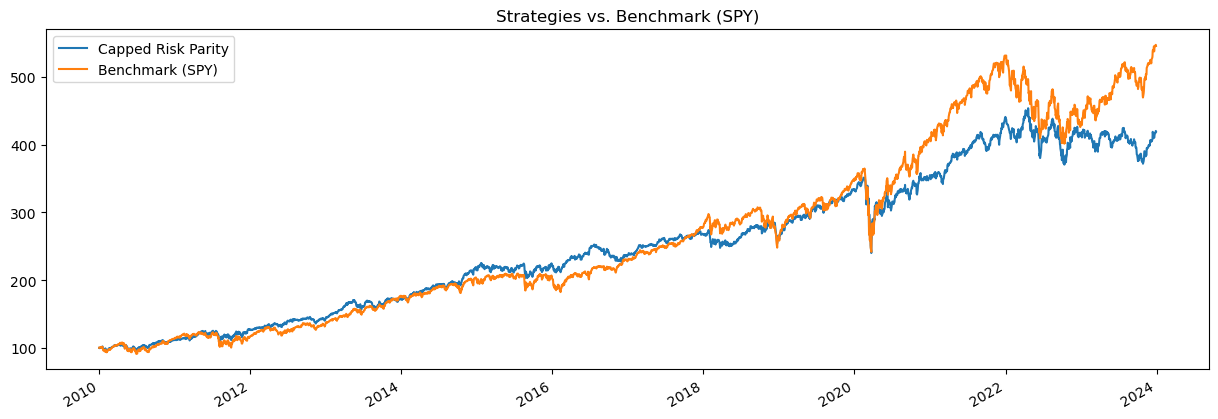

In [30]:
# 벤치마크 데이터 "SPY"
benchmark_data = yf.download("SPY", start="2010-01-01", end="2024-01-01")["Adj Close"]

benchmark_data = pd.DataFrame(benchmark_data)
benchmark_data.columns = ["SPY"]  

# 벤치마크 전략 정의
benchmark = bt.Strategy(
    'Benchmark (SPY)',
    [
        bt.algos.RunMonthly(),                   # 매월 실행
        bt.algos.SelectAll(),                    # SPY 선택
        bt.algos.WeighEqually(),                 # 동일 비중
        bt.algos.Rebalance()                     # 리밸런싱 실행
    ]
)

# 벤치마크 백테스트 실행
benchmark_backtest = bt.Backtest(benchmark, benchmark_data)

# 기존 전략과 벤치마크 비교 실행
# 기존 전략 백테스트 결과 리스트에 벤치마크 백테스트 추가
backtests = {"Capped Risk Parity": backtest_capped}  # 기존 백테스트 결과 추가
results_with_benchmark = bt.run(*backtests.values(), benchmark_backtest)

# 결과 출력
results_with_benchmark.plot(title="Strategies vs. Benchmark (SPY)")
results_with_benchmark.display()

### 자산군 확장

[*********************100%***********************]  7 of 7 completed
100%|██████████| 1/1 [00:01<00:00,  1.37s/it]


Stat                 Extended Risk Parity + Momentum
-------------------  ---------------------------------
Start                2010-01-03
End                  2023-12-29
Risk-free rate       0.00%

Total Return         131.00%
Daily Sharpe         0.49
Daily Sortino        0.74
CAGR                 6.17%
Max Drawdown         -31.08%
Calmar Ratio         0.20

MTD                  3.38%
3m                   8.27%
6m                   9.43%
YTD                  10.47%
1Y                   10.89%
3Y (ann.)            10.67%
5Y (ann.)            10.36%
10Y (ann.)           5.55%
Since Incep. (ann.)  6.17%

Daily Sharpe         0.49
Daily Sortino        0.74
Daily Mean (ann.)    7.05%
Daily Vol (ann.)     14.50%
Daily Skew           -0.91
Daily Kurt           10.39
Best Day             6.79%
Worst Day            -10.42%

Monthly Sharpe       0.55
Monthly Sortino      0.94
Monthly Mean (ann.)  7.33%
Monthly Vol (ann.)   13.41%
Monthly Skew         -0.54
Monthly Kurt         2.13
Best Month

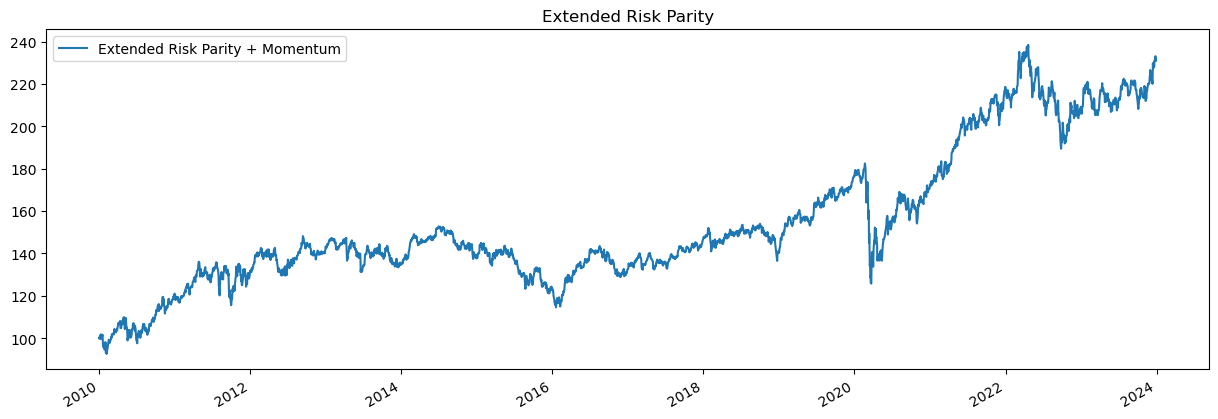

In [ ]:
import yfinance as yf
import bt
import pandas as pd

# TLT : 미국 장기 국채 추종 ETF / GLD : 금추종 ETF / USO : WTI 선물 추종 ETF

tickers_extended = ['XLV', 'XLU', 'XLP', 'VNQ', 'TLT', 'GLD', 'USO']
df_extended = yf.download(tickers_extended, start="2010-01-01", end="2024-01-01")['Adj Close']

# 모멘텀 기반 가중치 계산 함수
def calculate_momentum_risk_weights(data, momentum_window=126):
    returns = data.pct_change().dropna()
    momentum_scores = returns.iloc[-momentum_window:].mean()  # 모멘텀 계산 (평균 수익률)
    volatilities = returns.std()  # 변동성 계산
    weights = (momentum_scores / volatilities)  # 모멘텀/변동성 비율
    weights = weights / weights.sum()  # 정규화
    return weights

class MomentumRiskParityWeights(bt.Algo):
    def __init__(self, data, momentum_window=126):
        self.data = data
        self.momentum_window = momentum_window

    def __call__(self, target):
        if not target.temp['selected']:
            return False
        
        hist = self.data[target.temp['selected']]
        weights = calculate_momentum_risk_weights(hist, self.momentum_window)
        target.temp['weights'] = weights.to_dict()
        return True

# 확장된 자산군을 활용한 Risk Parity + Momentum 전략 정의
strategy_extended = bt.Strategy(
    'Extended Risk Parity + Momentum',
    [
        bt.algos.RunMonthly(),
        bt.algos.SelectAll(),
        MomentumRiskParityWeights(df_extended, momentum_window=126),  # 모멘텀 기반 위험 균등 가중치
        bt.algos.Rebalance()
    ]
)

# 백테스트 실행
backtest_extended = bt.Backtest(strategy_extended, df_extended)
result_extended = bt.run(backtest_extended)

# 결과 출력
result_extended.plot(title="Extended Risk Parity")
result_extended.display()

100%|██████████| 2/2 [00:00<?, ?it/s]


Stat                 Extended Risk Parity + Momentum    Benchmark (SPY)
-------------------  ---------------------------------  -----------------
Start                2010-01-03                         2010-01-03
End                  2023-12-29                         2023-12-29
Risk-free rate       0.00%                              0.00%

Total Return         131.00%                            445.51%
Daily Sharpe         0.49                               0.79
Daily Sortino        0.74                               1.22
CAGR                 6.17%                              12.90%
Max Drawdown         -31.08%                            -33.72%
Calmar Ratio         0.20                               0.38

MTD                  3.38%                              4.57%
3m                   8.27%                              11.64%
6m                   9.43%                              9.32%
YTD                  10.47%                             26.18%
1Y                   10.89%     

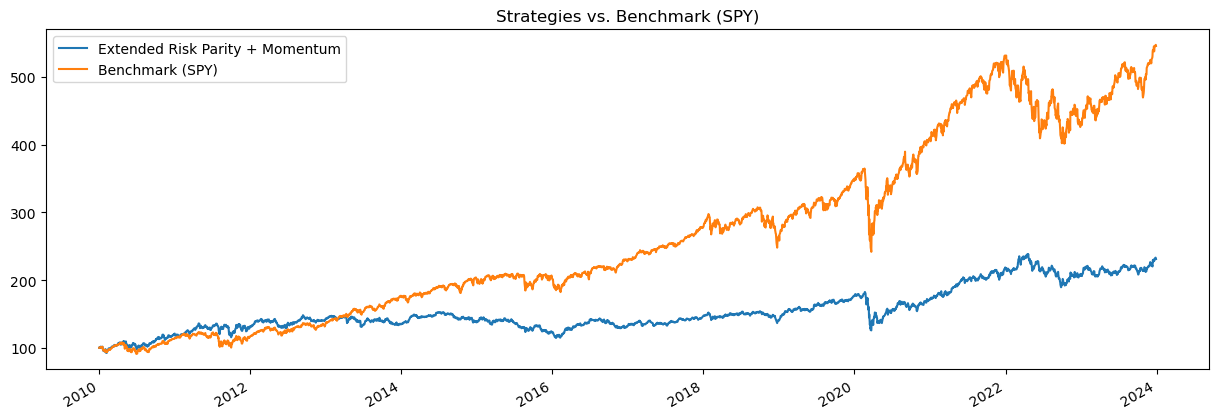

In [35]:
# 기존 전략과 벤치마크 비교 실행
# 기존 전략 백테스트 결과 리스트에 벤치마크 백테스트 추가
backtests = {"Extended Risk Parity + Momentum": backtest_extended}  # 기존 백테스트 결과 추가
results_with_benchmark = bt.run(*backtests.values(), benchmark_backtest)

# 결과 출력
results_with_benchmark.plot(title="Strategies vs. Benchmark (SPY)")
results_with_benchmark.display()

In [42]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [43]:
from prophet import Prophet
import matplotlib.pyplot as plt

# 백테스트 결과를 가져오기
# 백테스트의 `result_capped`를 사용하여 포트폴리오 가치(Time Series) 추출
portfolio_value = result_capped.prices  # 포트폴리오의 시계열 데이터

# Prophet 입력 형식으로 데이터 변환
df_prophet = portfolio_value.reset_index()
df_prophet.columns = ['ds', 'y']  # Prophet 요구 형식: 날짜(ds), 값(y)

# Prophet 모델 생성 및 학습
model = Prophet()
model.fit(df_prophet)

# 미래 예측: 1년(365일) 추가 예측
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# 예측 결과 시각화
fig = model.plot(forecast)
plt.title("Capped Risk Parity Portfolio - Future Prediction")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.show()

# 예측 결과 출력
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

AttributeError: 'Prophet' object has no attribute 'stan_backend'

In [44]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Prophet 모델 생성 (cmdstanpy 백엔드 사용)
model = Prophet(stan_backend="CMDSTANPY")  # 명시적으로 CMDSTANPY 백엔드 설정

# Prophet 입력 데이터 준비
portfolio_value = result_capped.prices.reset_index()  # 포트폴리오 가치 데이터
portfolio_value.columns = ['ds', 'y']  # Prophet 요구 형식으로 변경

# Prophet 모델 학습
model.fit(portfolio_value)

# 미래 예측 (365일 예측)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# 예측 결과 시각화
fig = model.plot(forecast)
plt.title("Capped Risk Parity Portfolio - Future Prediction")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.show()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc1 in position 0: invalid start byte